# Import Library

Import Library

In [1]:
# Data Manipulation & Analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno

# data Visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import missingno as msno
import cufflinks as cf
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Machine learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# sklearn Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# sklearn metrics

from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score, matthews_corrcoef,auc, roc_auc_score,f1_score, log_loss,precision_recall_curve
from sklearn.metrics import roc_curve

#sklearn Base
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split


#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import pickle

cf.set_config_file(world_readable=True,offline=False)
pd.set_option('display.max_columns', None)

## Data Preparation

In [2]:
df_fraud = pd.read_csv('fraud_train.csv')

In [3]:
df_fraud.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


## Create Index

In [4]:
indx = []
for i in range(0, 13125):
    indx.append(i)

In [5]:
df_fraud['id_transaksi'] = indx

# Data Observation

In [7]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 29 columns):
X                             13125 non-null int64
id_tanggal_transaksi_awal     13125 non-null int64
tanggal_transaksi_awal        13125 non-null int64
tipe_kartu                    13125 non-null int64
id_merchant                   13125 non-null int64
nama_merchant                 13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nama_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_negara                   13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
pemilik_mesin                 13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu     

In [8]:
df_fraud.shape

(13125, 29)

## Missing Value Observation & Handling

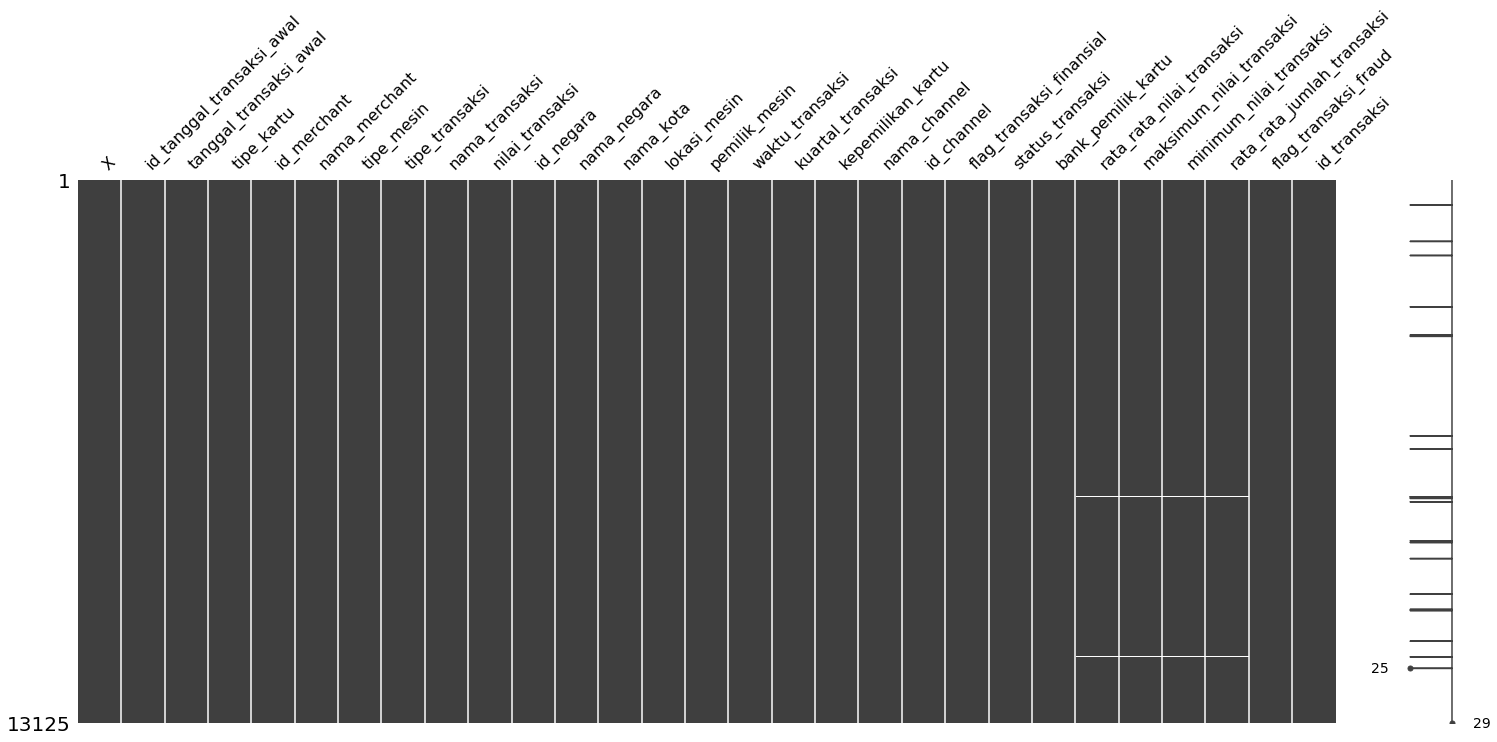

In [9]:
msno.matrix(df_fraud)

In [10]:
df_fraud[df_fraud['rata_rata_nilai_transaksi'].isnull()].shape

(21, 29)

In [11]:
df_fraud[df_fraud['maksimum_nilai_transaksi'].isnull()].shape

(21, 29)

In [12]:
df_fraud[df_fraud['minimum_nilai_transaksi'].isnull()].shape

(21, 29)

In [13]:
df_fraud[df_fraud['rata_rata_jumlah_transaksi'].isnull()].shape

(21, 29)

In [14]:
df_fraud = df_fraud.dropna()

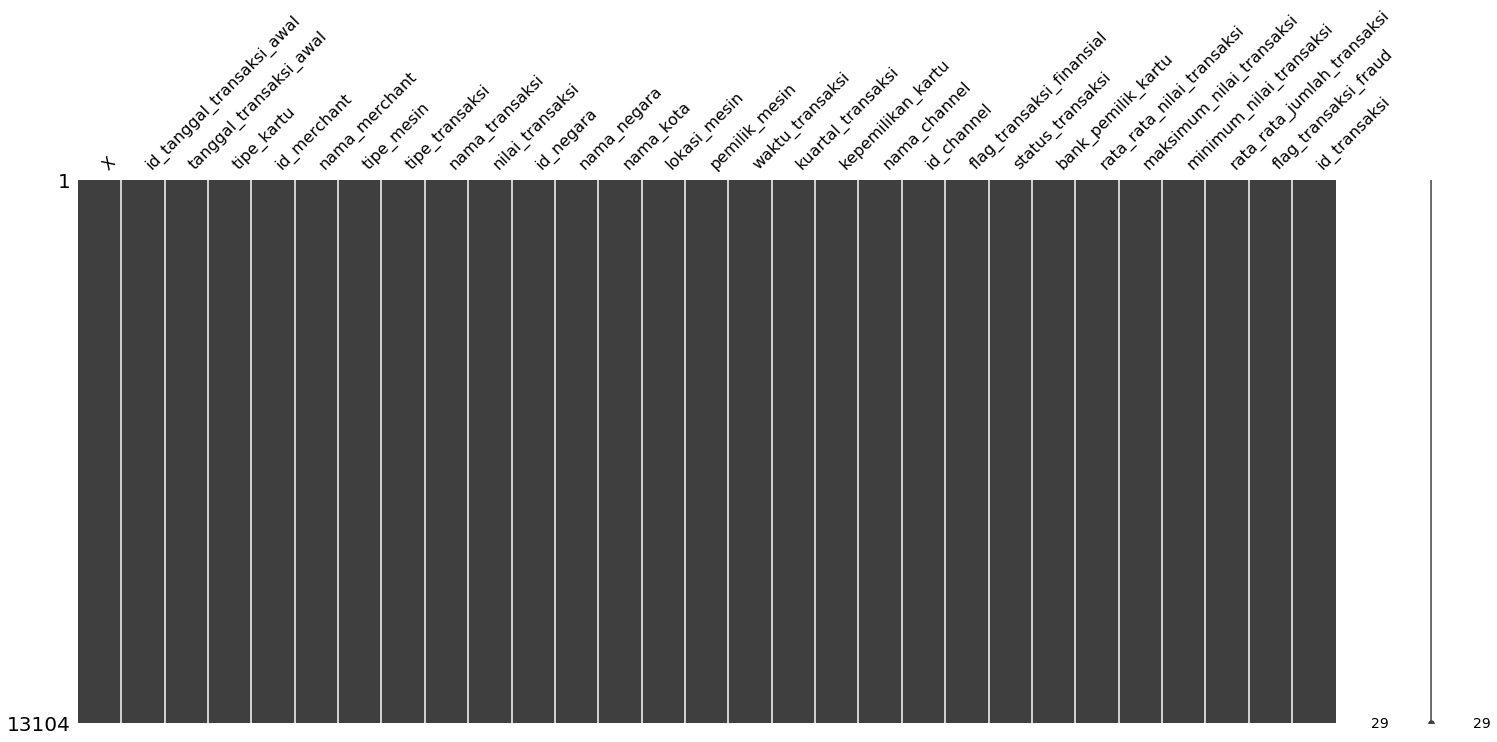

In [15]:
msno.matrix(df_fraud)

# Data Screening

In [16]:
lis = []
for col in df_fraud.columns:
    lis.append([col, df_fraud[col].dtype, sum(df_fraud[col].isnull()), 100*(sum(df_fraud[col].isnull())/len(df_fraud[col])), 
                df_fraud[col].nunique()])
pd.DataFrame(lis, columns=['Name', 'Type', 'jml Null', '% Null', 'Unique'])

,Name,Type,jml Null,% Null,Unique
0,X,int64,0,0.0,8780
1,id_tanggal_transaksi_awal,int64,0,0.0,360
2,tanggal_transaksi_awal,int64,0,0.0,452
3,tipe_kartu,int64,0,0.0,14
4,id_merchant,int64,0,0.0,1121
5,nama_merchant,int64,0,0.0,1105
6,tipe_mesin,int64,0,0.0,5338
7,tipe_transaksi,int64,0,0.0,20
8,nama_transaksi,int64,0,0.0,20
9,nilai_transaksi,float64,0,0.0,1423


In [18]:
df_fraud.drop(['flag_transaksi_finansial', 'status_transaksi', 'bank_pemilik_kartu'], axis = 1)

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,id_transaksi
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,1.332293e+06,9750000.0,10000.0,2.73,0,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,1.369048e+06,10000000.0,30000.0,2.33,1,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,1.552346e+07,100000000.0,41804.0,2.40,0,2
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,7.117647e+05,6884408.0,10000.0,1.98,0,3
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,6.179683e+05,2500000.0,100000.0,1.46,0,4
5,6947,2457413,2457453,111,-2,1798,16834,385,11,100000.0,96,5,128,744,613,191633,4,2,1,9,2.742308e+05,1300000.0,20600.0,1.69,0,5
6,14131,2457615,2457640,93,-2,1798,1850104,385,11,2000000.0,96,5,128,2302,613,115558,2,2,1,9,2.326051e+06,40000000.0,100000.0,1.79,0,6
7,4811,2457429,2457463,0,-2,1798,2435842,385,11,150000.0,96,5,128,3963,613,142702,3,2,1,9,3.924000e+05,4320000.0,25000.0,1.41,0,7
8,1458,2457371,2457453,93,-2,1798,1370214,159,19,50000.0,96,5,265,1068,613,174044,3,2,1,9,7.512486e+05,3550000.0,25000.0,1.88,0,8
9,4123,2457320,2457365,93,-2,1798,1942704,26,10,1250000.0,96,5,241,2628,613,213705,4,2,1,9,9.893071e+05,28000000.0,10000.0,3.64,0,9


In [19]:
df_fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
X,13104.0,7.509516e+03,4.326882e+03,1.0,3.784750e+03,7475.500,1.126800e+04,1.500000e+04
id_tanggal_transaksi_awal,13104.0,2.457490e+06,1.048163e+02,2457297.0,2.457404e+06,2457500.000,2.457581e+06,2.457662e+06
tanggal_transaksi_awal,13104.0,2.457541e+06,1.088619e+02,2457303.0,2.457451e+06,2457543.000,2.457632e+06,2.457754e+06
tipe_kartu,13104.0,8.531036e+01,4.094608e+01,0.0,9.300000e+01,103.000,1.110000e+02,1.380000e+02
id_merchant,13104.0,3.933422e+04,1.242402e+05,-2.0,-2.000000e+00,-2.000,-2.000000e+00,7.209900e+05
nama_merchant,13104.0,1.678309e+03,3.614942e+02,2.0,1.798000e+03,1798.000,1.798000e+03,1.859000e+03
tipe_mesin,13104.0,1.649208e+06,9.911708e+05,-4.0,1.130703e+06,1836319.000,2.419356e+06,6.928943e+06
tipe_transaksi,13104.0,1.788516e+02,1.425456e+02,26.0,2.600000e+01,156.000,3.010000e+02,6.400000e+02
nama_transaksi,13104.0,1.072917e+01,3.890391e+00,1.0,9.000000e+00,10.000,1.100000e+01,2.000000e+01
nilai_transaksi,13104.0,1.314923e+06,2.837644e+06,1.0,2.000000e+05,572575.000,1.251524e+06,7.500000e+07


# Removing Outliers

In [20]:
df_fraud.shape

(13104, 29)

In [21]:
dictbatasmax = {}
for col in ['kuartal_transaksi', 'waktu_transaksi', 'rata_rata_nilai_transaksi','rata_rata_jumlah_transaksi']:
    Q3 = np.percentile(df_fraud[col], 75)
    Q1 = np.percentile(df_fraud[col], 25)
    IQR = Q3-Q1 
    outlier_step = 1.5 * IQR
    dictbatasmax[col] = Q3 +outlier_step

In [22]:
for col in ['kuartal_transaksi', 'waktu_transaksi', 'rata_rata_nilai_transaksi','rata_rata_jumlah_transaksi']:
    df_fraud[col] = df_fraud[col].apply(lambda x: dictbatasmax[col] if x > dictbatasmax[col] else x)

In [23]:
df_fraud.shape

(13104, 29)

# Target Class Distribution

In [24]:
attrition = df_fraud[(df_fraud['flag_transaksi_fraud'] != 0)]
no_attrition = df_fraud[(df_fraud['flag_transaksi_fraud'] == 0)]


trace = go.Pie(labels = ['No Fraud', 'Fraud'], values = df_fraud['flag_transaksi_fraud'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['gold','sky blue'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Attrition')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

As we can see from chart above the target class is imbalance with 75% dominance by majority class (No Fraud)

### Correlation Between Features

In [25]:
corr=df_fraud.corr()
corr=(corr)
corr

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,id_transaksi
X,1.000000,0.007110,0.011359,-0.002085,0.019933,-0.011438,0.008670,0.001955,-0.002270,0.020637,0.011552,0.003235,-0.005306,0.008468,0.002554,0.012683,0.016855,0.015717,-0.010937,-0.010855,NaN,NaN,NaN,0.012798,-0.004025,-0.011313,-0.012181,0.001761,-0.011320
id_tanggal_transaksi_awal,0.007110,1.000000,0.966440,0.108348,0.043957,-0.023162,0.134510,-0.008882,-0.000918,-0.000376,-0.032109,0.040481,0.029184,0.057042,0.004067,-0.006893,-0.003567,0.006995,-0.001711,-0.019119,NaN,NaN,NaN,0.031001,0.034766,0.010426,-0.019236,0.042106,0.027127
tanggal_transaksi_awal,0.011359,0.966440,1.000000,0.104532,0.037510,-0.015920,0.124091,-0.011641,0.007062,0.005766,-0.031395,0.048412,0.021276,0.059186,0.008746,-0.008207,-0.004645,-0.024618,0.025963,-0.015708,NaN,NaN,NaN,0.031139,0.031745,0.008588,-0.022491,0.075079,0.023581
tipe_kartu,-0.002085,0.108348,0.104532,1.000000,-0.033206,0.015958,0.014145,0.000087,0.016516,-0.023193,0.003108,-0.018701,0.018548,-0.008454,-0.023548,0.013973,0.006155,-0.004692,-0.005277,0.032103,NaN,NaN,NaN,-0.051463,-0.015401,-0.030954,0.029776,-0.035619,0.009549
id_merchant,0.019933,0.043957,0.037510,-0.033206,1.000000,-0.663482,0.260223,-0.224693,-0.398620,-0.075695,-0.005151,-0.014868,0.037355,0.365926,0.453584,0.072008,0.073374,0.085264,0.186352,-0.778713,NaN,NaN,NaN,-0.052904,-0.007083,-0.004554,-0.022167,-0.043322,-0.000802
nama_merchant,-0.011438,-0.023162,-0.015920,0.015958,-0.663482,1.000000,-0.243286,0.227716,0.426269,0.081375,0.005387,0.015548,-0.008322,-0.385724,-0.171981,-0.070069,-0.063425,-0.089164,-0.194878,0.814340,NaN,NaN,NaN,0.063046,0.014682,0.009729,0.029518,0.050916,0.000072
tipe_mesin,0.008670,0.134510,0.124091,0.014145,0.260223,-0.243286,1.000000,-0.051766,-0.197843,-0.048703,-0.027071,-0.078134,0.069649,0.449448,0.069245,0.031422,0.031718,0.448086,-0.332315,-0.236731,NaN,NaN,NaN,-0.034946,-0.013317,0.001446,-0.007484,-0.152405,0.011200
tipe_transaksi,0.001955,-0.008882,-0.011641,0.000087,-0.224693,0.227716,-0.051766,1.000000,0.227582,0.051894,-0.007760,-0.005341,-0.015097,-0.109865,-0.203524,-0.017301,-0.011670,0.021874,-0.120916,0.295716,NaN,NaN,NaN,0.013914,-0.011259,-0.008196,-0.013142,0.016216,-0.003406
nama_transaksi,-0.002270,-0.000918,0.007062,0.016516,-0.398620,0.426269,-0.197843,0.227582,1.000000,0.241829,0.003320,0.016185,-0.015128,-0.285542,-0.286099,-0.023136,-0.027284,-0.093750,-0.082133,0.498428,NaN,NaN,NaN,0.081211,0.041811,0.005244,0.056659,0.055639,0.003236
nilai_transaksi,0.020637,-0.000376,0.005766,-0.023193,-0.075695,0.081375,-0.048703,0.051894,0.241829,1.000000,0.001465,0.062927,0.003209,-0.032879,-0.053228,-0.019857,-0.022532,-0.019989,-0.018735,0.093400,NaN,NaN,NaN,0.330853,0.219751,0.025245,0.108140,0.101302,-0.000734


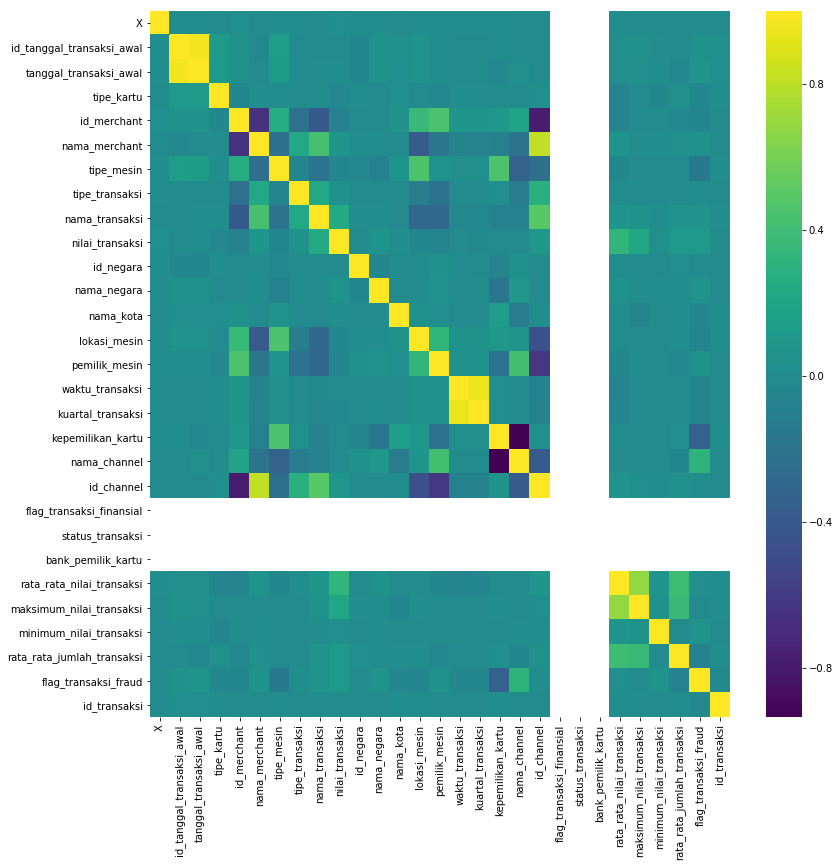

In [26]:
plt.figure(figsize=(13, 13))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='viridis')

strong Correlation : * (tanggal - tanggal)
                     * (waktu-waktu)
                     * (transaksi-transaksi)

### Observation on Numerical Features

C:\Users\Public\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



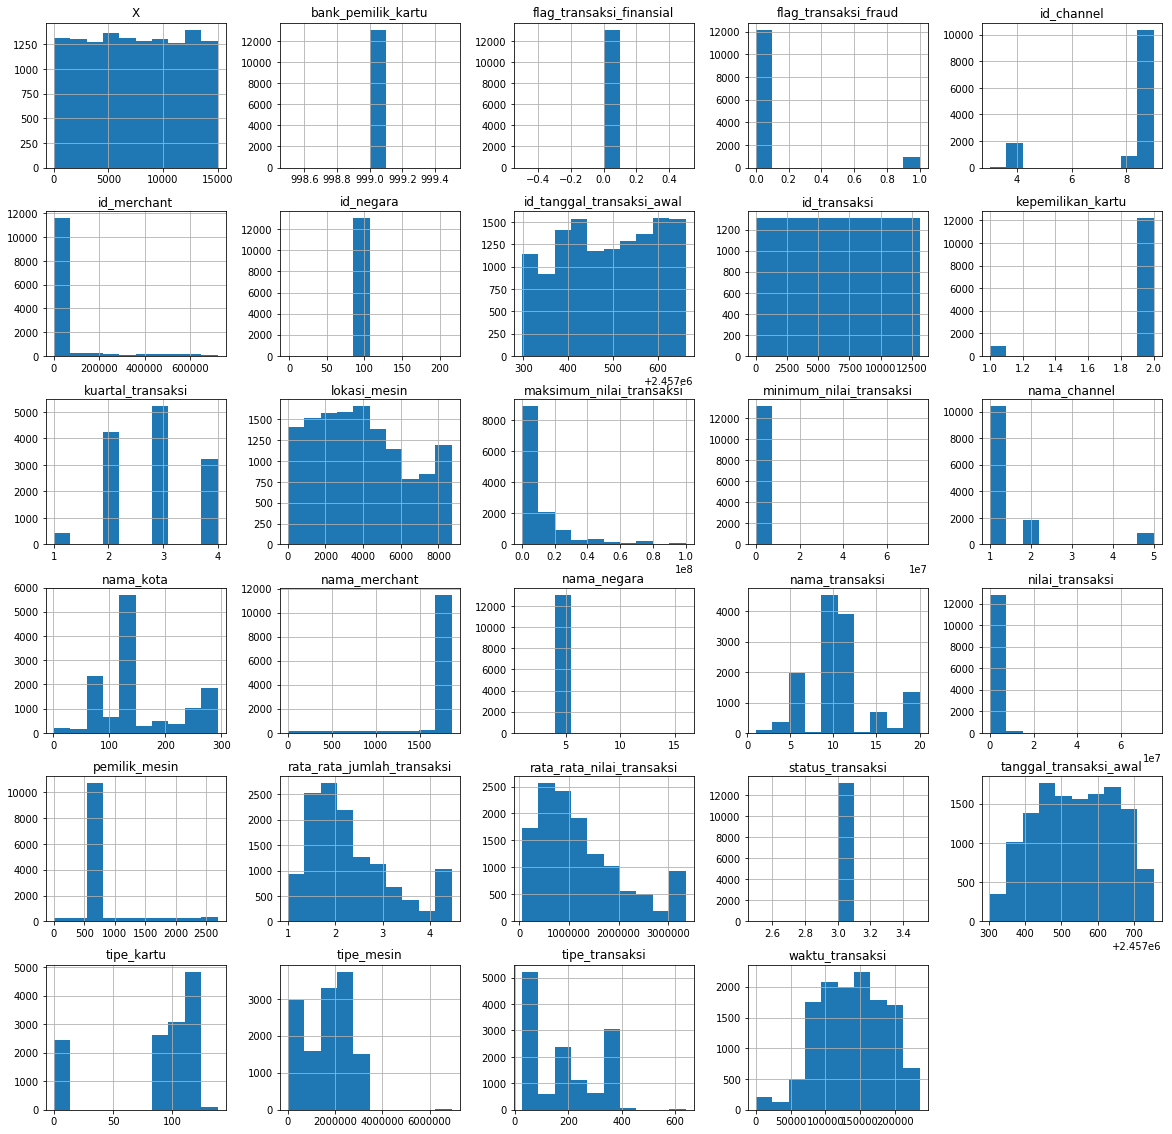

In [27]:
df_fraud.hist(figsize=(20,20))
plt.show()

### Density of Fraud by features

In [28]:
df_fraud.columns

Index(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal',
       'tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel', 'flag_transaksi_finansial',
       'status_transaksi', 'bank_pemilik_kartu', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'flag_transaksi_fraud', 'id_transaksi'],
      dtype='object')

# Jenis Kartu

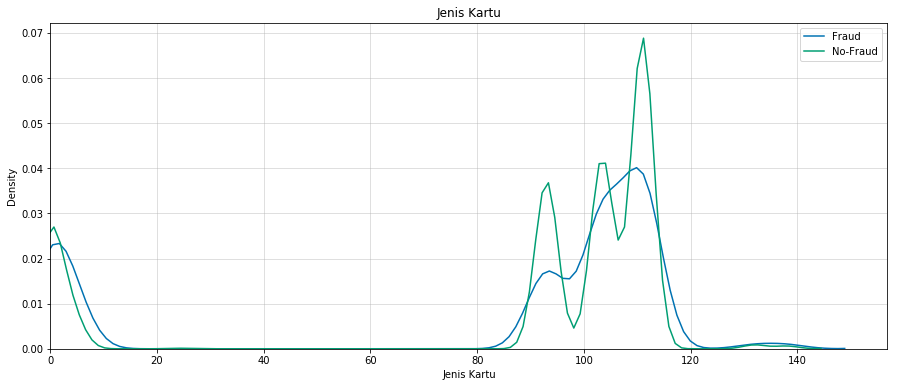

In [29]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_fraud.loc[df_fraud['flag_transaksi_fraud'] == 1, 'tipe_kartu'], label = 'Fraud')
sns.kdeplot(df_fraud.loc[df_fraud['flag_transaksi_fraud'] == 0, 'tipe_kartu'], label = 'No-Fraud')
plt.xlabel('Jenis Kartu')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Jenis Kartu');

In [30]:
listItem = []
for col in df_fraud['tipe_kartu'].unique():
    listItem.append([col, 
                    (df_fraud[(df_fraud['flag_transaksi_fraud']==1)&(df_fraud['tipe_kartu']==col)]['flag_transaksi_fraud'].count() / df_fraud[df_fraud['tipe_kartu']==col]['flag_transaksi_fraud'].count() * 100),
                    (df_fraud[(df_fraud['flag_transaksi_fraud']==0)&(df_fraud['tipe_kartu']==col)]['flag_transaksi_fraud'].count() / df_fraud[df_fraud['tipe_kartu']==col]['flag_transaksi_fraud'].count() * 100),
                     len(df_fraud[df_fraud['tipe_kartu']== col])])
    
dfPaid = pd.DataFrame(listItem, columns='Tipe Kartu,No Fraud,Fraud, sum'.split(','))
dfPaid.sort_values(ascending = False, by = 'Fraud')

,Tipe Kartu,No Fraud,Fraud,sum
12,24,0.000000,100.000000,8
13,28,0.000000,100.000000,1
4,93,5.219048,94.780952,2625
0,111,5.977249,94.022751,4835
2,103,7.130435,92.869565,1725
3,0,7.520714,92.479286,1569
6,104,8.314937,91.685063,1359
1,2,8.762887,91.237113,194
10,132,10.769231,89.230769,65
9,1,11.398964,88.601036,193


# Negara

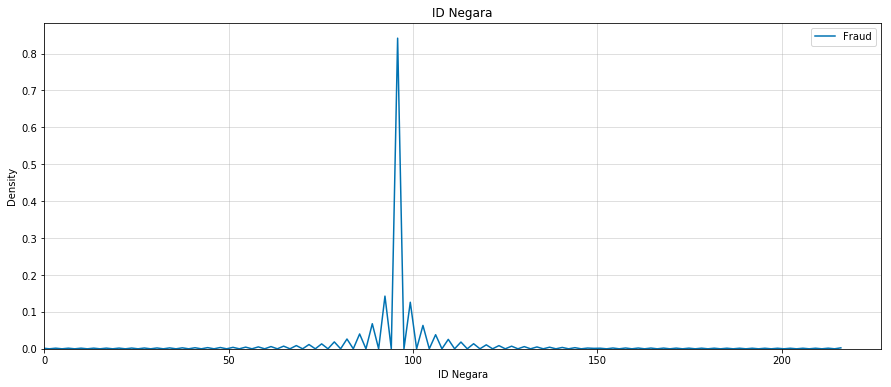

In [31]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_fraud.loc[df_fraud['flag_transaksi_fraud'] == 1, 'id_negara'], label = 'Fraud')
plt.xlabel('ID Negara')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('ID Negara');

In [32]:
listItem = []
for col in df_fraud['id_merchant'].unique():
    listItem.append([col, 
                    (df_fraud[(df_fraud['flag_transaksi_fraud']==1)&(df_fraud['id_merchant']==col)]['flag_transaksi_fraud'].count() / df_fraud[df_fraud['id_merchant']==col]['flag_transaksi_fraud'].count() * 100),
                    (df_fraud[(df_fraud['flag_transaksi_fraud']==0)&(df_fraud['id_merchant']==col)]['flag_transaksi_fraud'].count() / df_fraud[df_fraud['id_merchant']==col]['flag_transaksi_fraud'].count() * 100),
                     len(df_fraud[df_fraud['tipe_kartu']== col])])
    
dfPaid = pd.DataFrame(listItem, columns='Tipe Kartu,Fraud,No fraud, sum'.split(','))
dfPaid.sort_values(ascending = False, by = 'Fraud').head()

,Tipe Kartu,Fraud,No fraud,sum
834,31315,100.0,0.0,0
178,114302,100.0,0.0,0
43,93594,100.0,0.0,0
499,569109,100.0,0.0,0
1037,498410,100.0,0.0,0


# Jenis Kartu

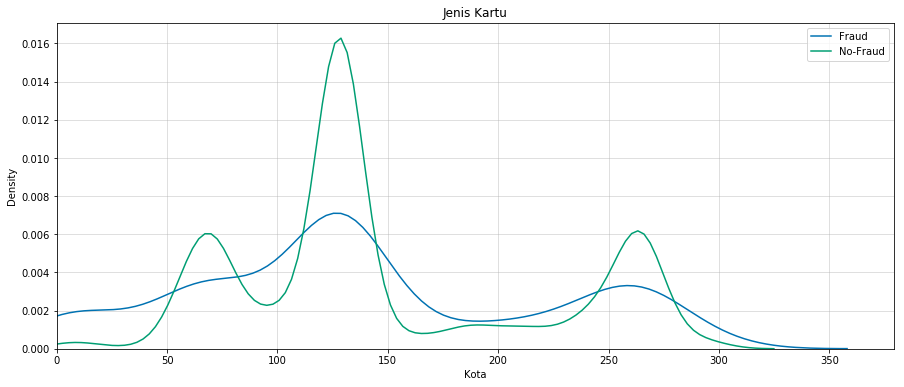

In [33]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_fraud.loc[df_fraud['flag_transaksi_fraud'] == 1, 'nama_kota'], label = 'Fraud')
sns.kdeplot(df_fraud.loc[df_fraud['flag_transaksi_fraud'] == 0, 'nama_kota'], label = 'No-Fraud')
plt.xlabel('Kota')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Jenis Kartu');

In [34]:
listItem = []
for col in df_fraud['nama_kota'].unique():
    listItem.append([col, 
                    (df_fraud[(df_fraud['flag_transaksi_fraud']==1)&(df_fraud['nama_kota']==col)]['flag_transaksi_fraud'].count() / df_fraud[df_fraud['nama_kota']==col]['flag_transaksi_fraud'].count() * 100),
                    (df_fraud[(df_fraud['flag_transaksi_fraud']==0)&(df_fraud['nama_kota']==col)]['flag_transaksi_fraud'].count() / df_fraud[df_fraud['nama_kota']==col]['flag_transaksi_fraud'].count() * 100),
                     len(df_fraud[df_fraud['tipe_kartu']== col])])
    
dfPaid = pd.DataFrame(listItem, columns='Kota,Fraud,No fraud, sum'.split(','))
dfPaid.sort_values(ascending = False, by = 'Fraud').head()

,Kota,Fraud,No fraud,sum
86,143,100.0,0.0,0
155,78,100.0,0.0,0
215,133,100.0,0.0,0
131,283,100.0,0.0,0
126,42,100.0,0.0,0


In [35]:
df_fraud[df_fraud['nama_kota'] == 143]

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,id_transaksi
1031,13142,2457420,2457449,103,-2,1798,-3,156,12,600000.0,216,11,143,5539,811,164815,3,1,5,8,False,3,999,439029.9451,3004500.0,40800.0,1.68,1,1031


# Waktu transaksi

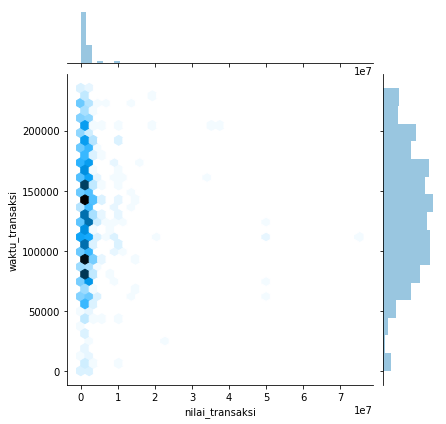

In [36]:
sns.jointplot(x = 'nilai_transaksi', y = 'waktu_transaksi', data = df_fraud[df_fraud['flag_transaksi_fraud'] == 1], kind = 'hex')

# Jumlah Transaksi

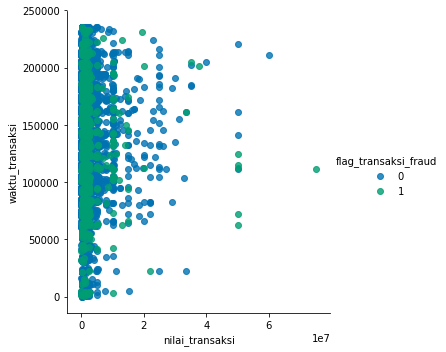

In [37]:
sns.lmplot(x = 'nilai_transaksi', y = 'waktu_transaksi', hue = 'flag_transaksi_fraud', data = df_fraud, fit_reg=False)

# Tanggal transaksi

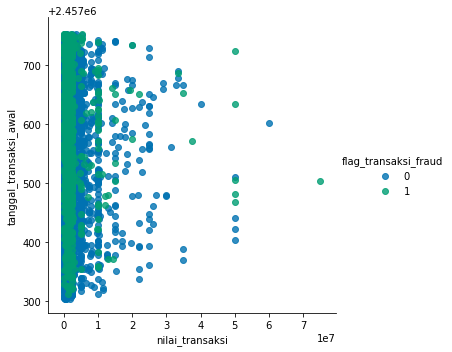

In [38]:
sns.lmplot(x = 'nilai_transaksi', y = 'tanggal_transaksi_awal', hue = 'flag_transaksi_fraud', data = df_fraud, fit_reg=False)

# Rata-Rata Nilai Transaksi

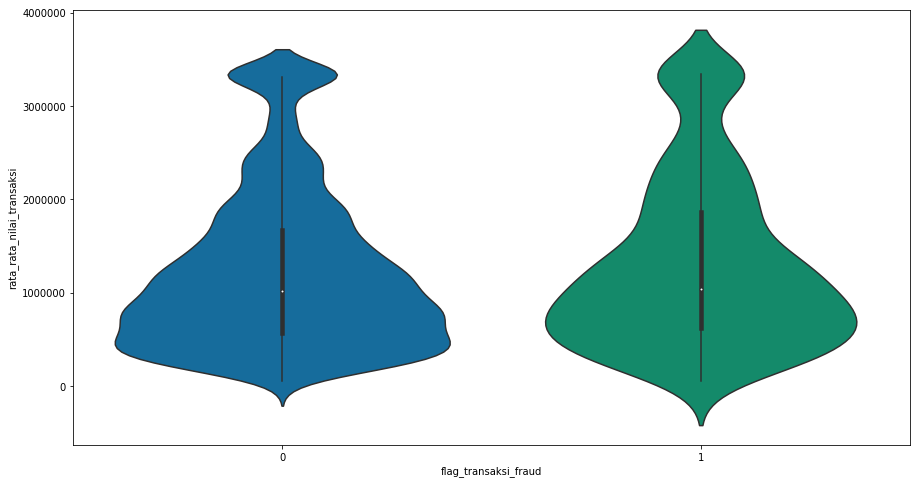

In [39]:
plt.figure(figsize=(15,8))
sns.violinplot(y = 'rata_rata_nilai_transaksi', x = 'flag_transaksi_fraud', data = df_fraud)

In [40]:
df_fraud.columns

Index(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal',
       'tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel', 'flag_transaksi_finansial',
       'status_transaksi', 'bank_pemilik_kartu', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'flag_transaksi_fraud', 'id_transaksi'],
      dtype='object')

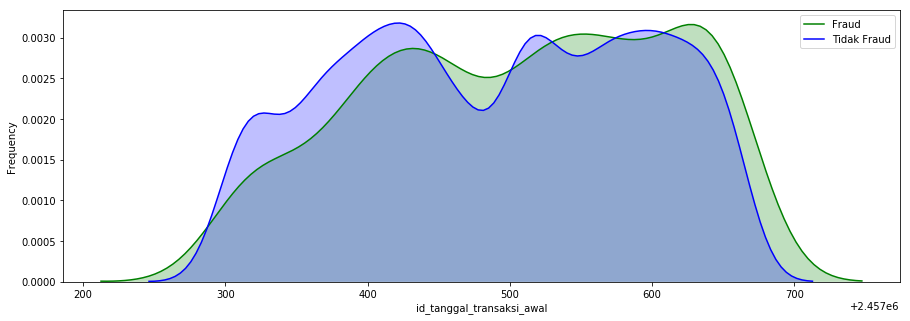

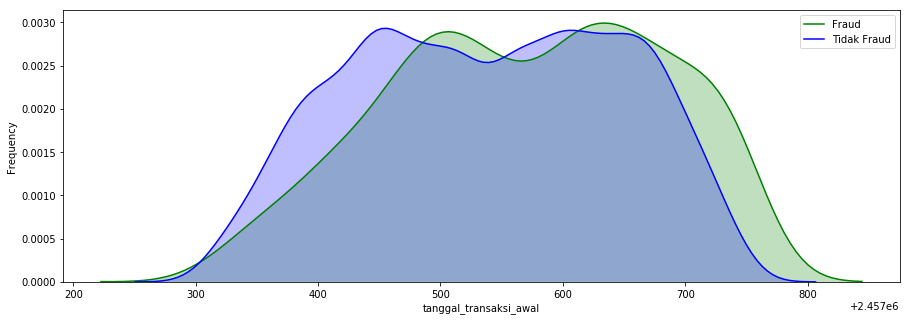

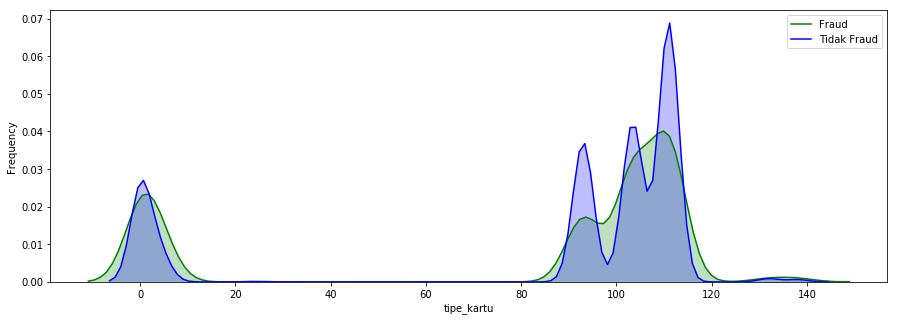

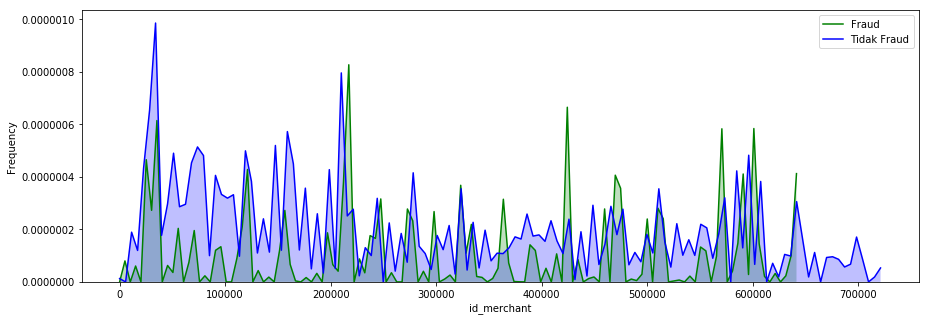

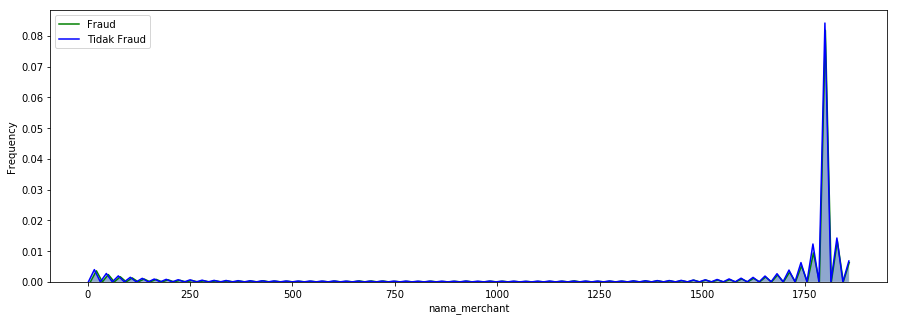

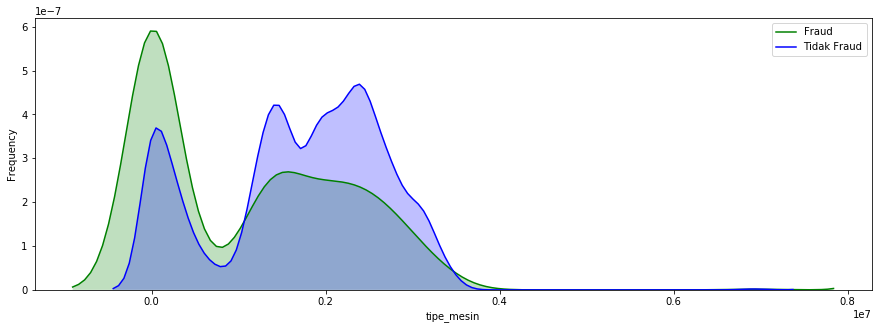

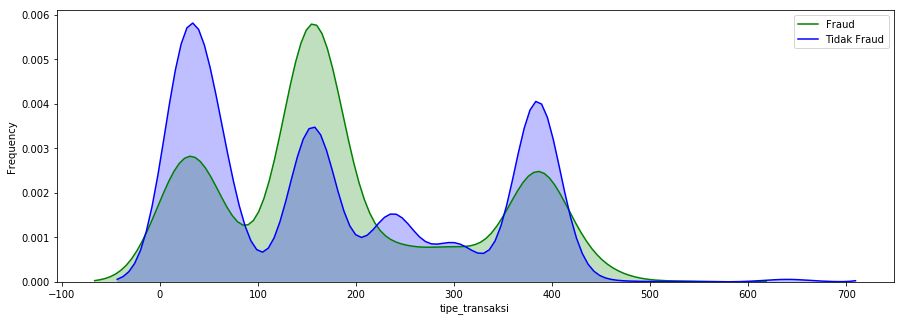

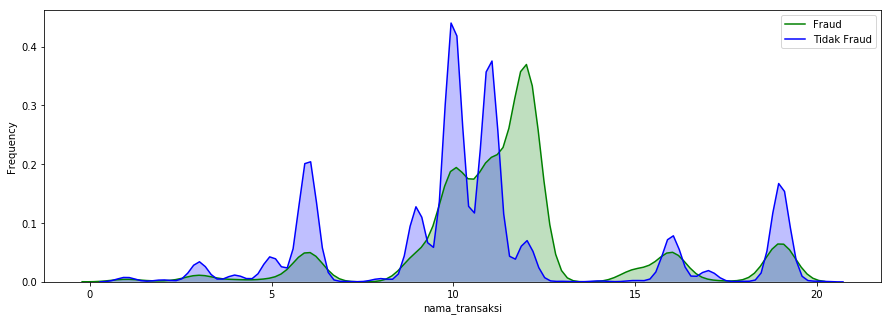

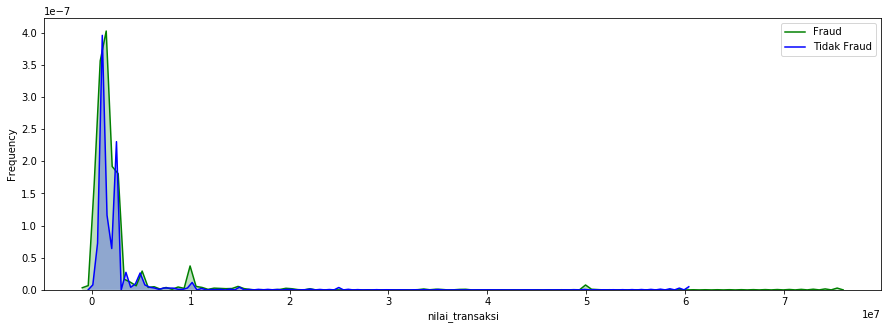

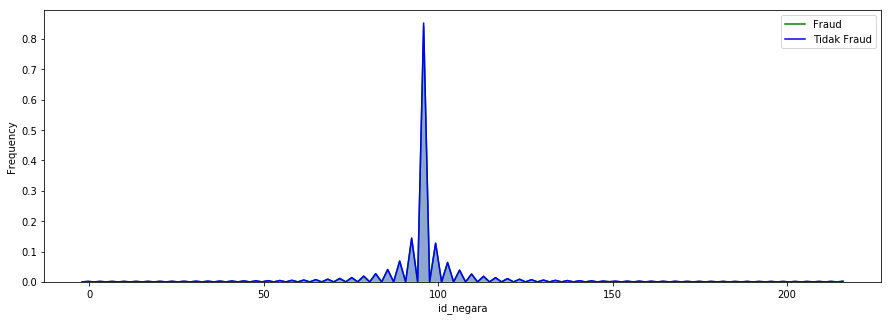

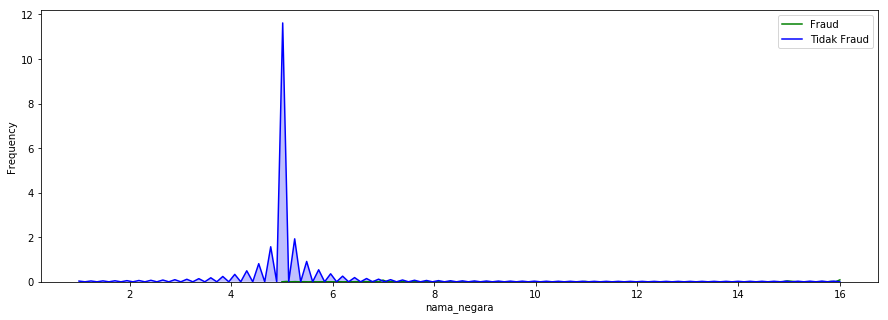

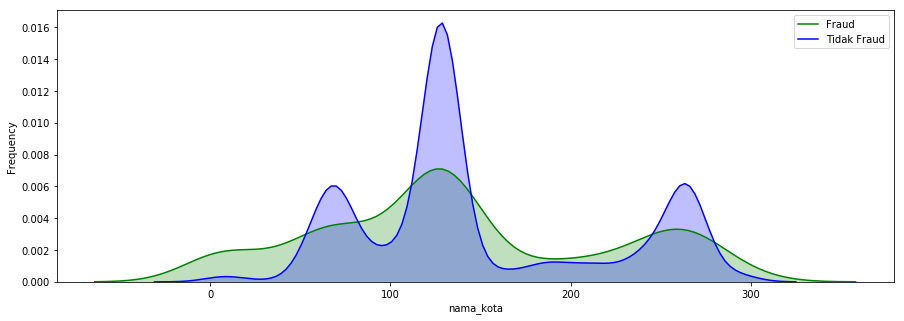

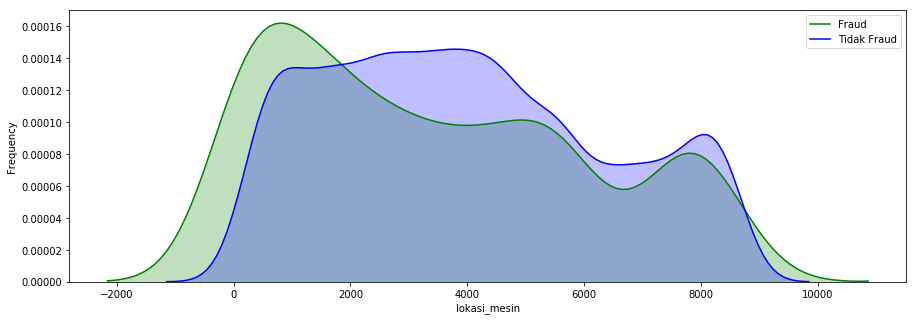

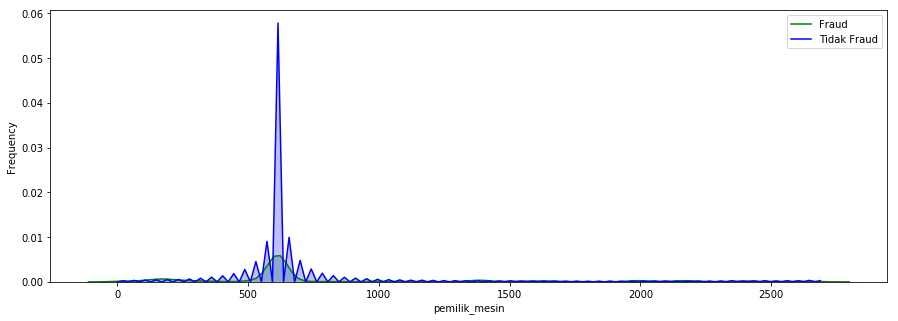

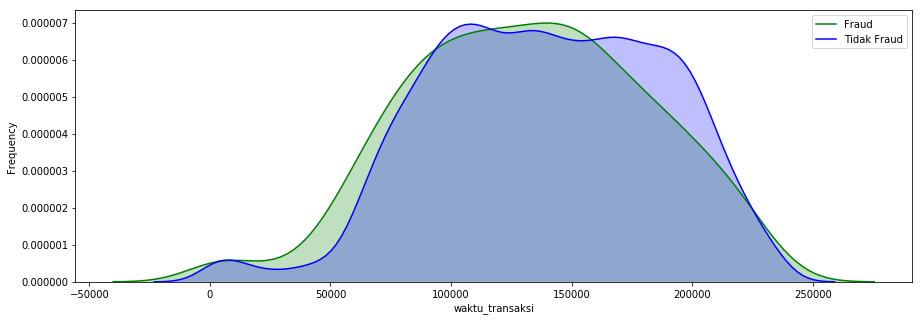

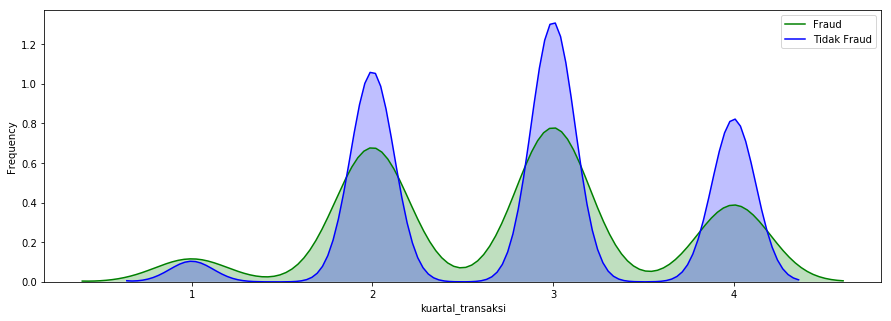

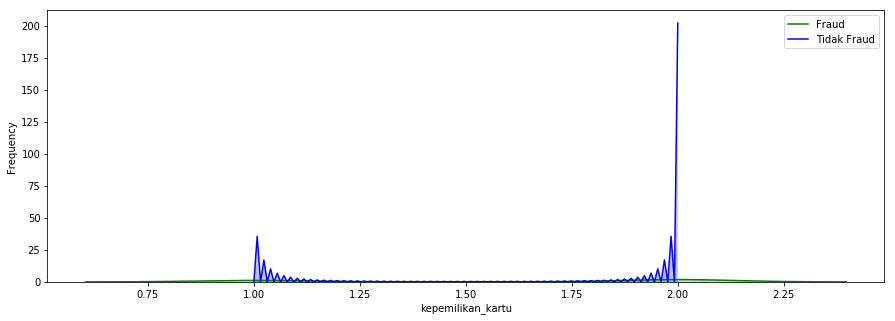

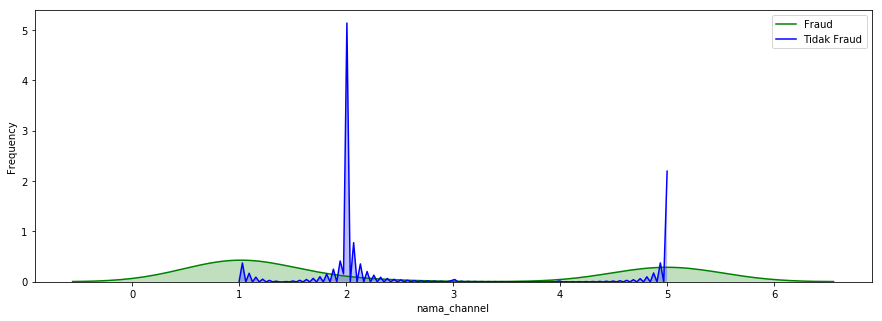

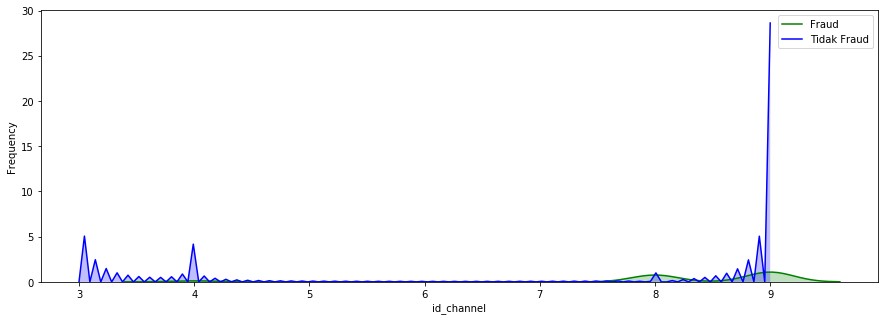

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



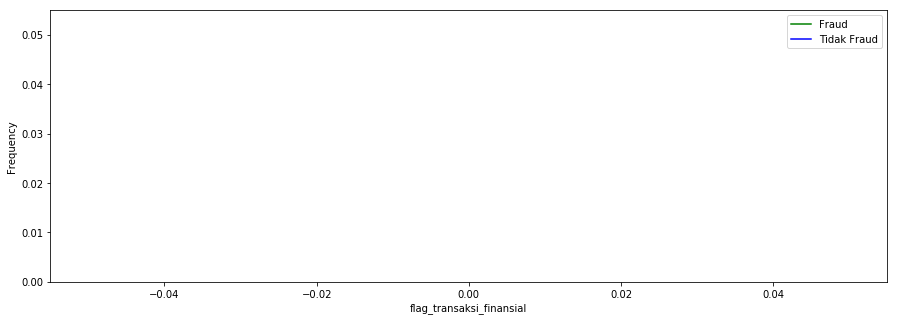

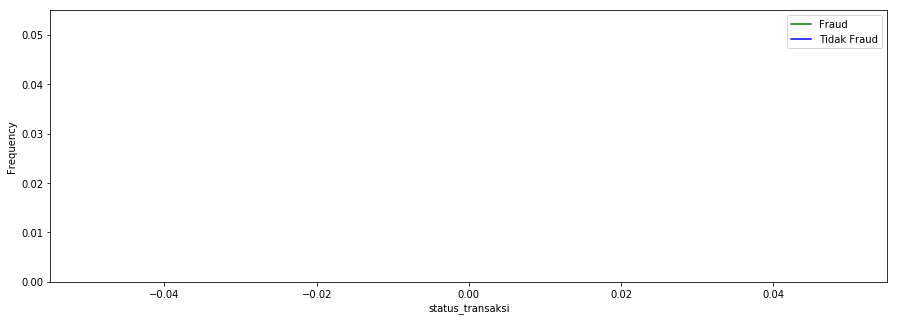

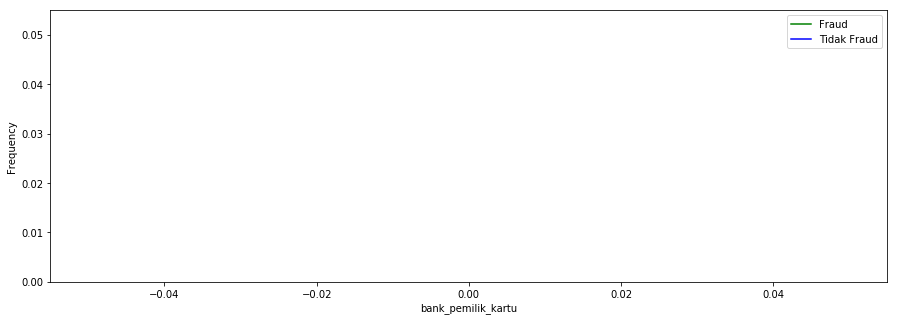

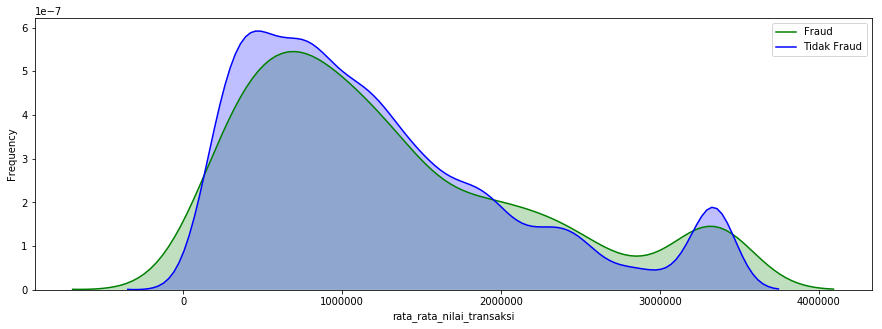

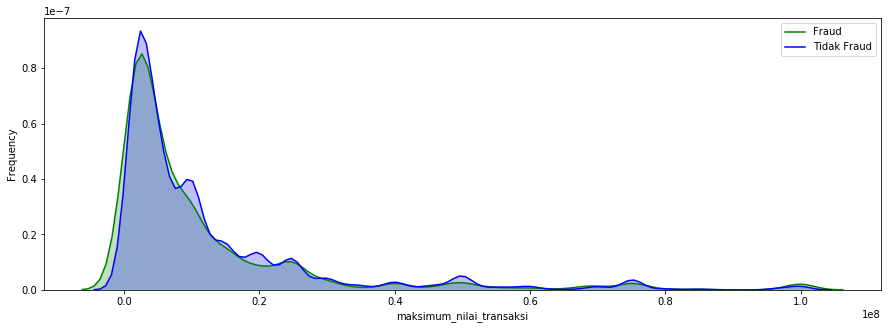

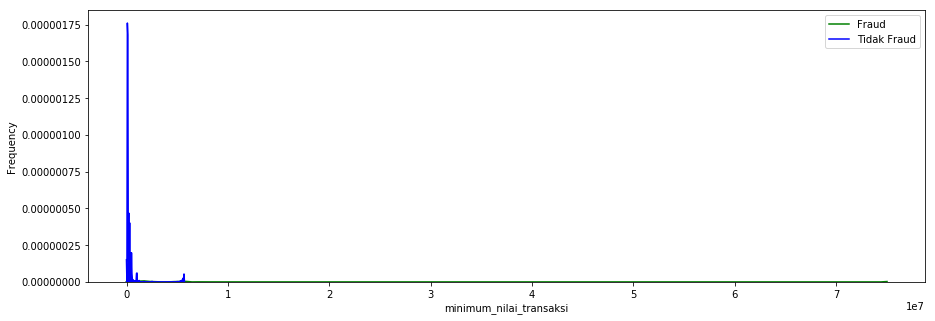

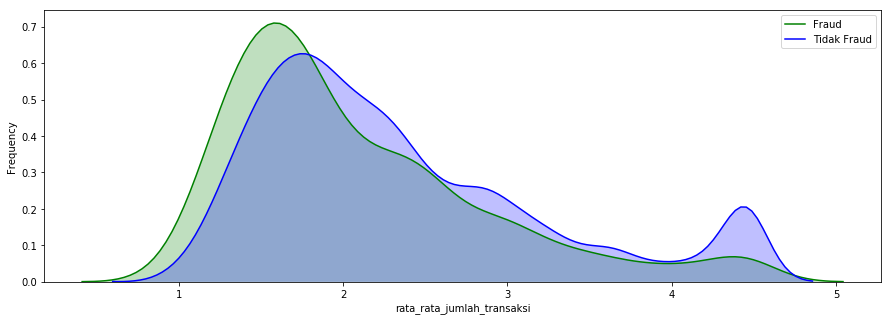

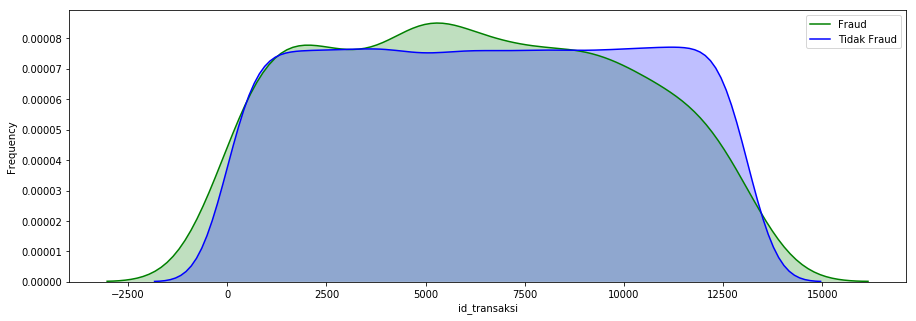

In [41]:
for col in df_fraud.drop(['X', 'flag_transaksi_fraud'], axis = 1).select_dtypes(exclude=['object']).columns:
    plt.figure(figsize=(15,5))
    g = sns.kdeplot(df_fraud[
        (df_fraud['flag_transaksi_fraud'] == 1)
#         & (train[col] <= train[col].mean() + (3*train[col].std()))
#         & (train[col] >= train[col].mean() + (3*train[col].std()))
    ][col], color = 'green', shade = True)
    g = sns.kdeplot(df_fraud[
        (df_fraud['flag_transaksi_fraud'] == 0)
#         & (train[col] <= train[col].mean() + (3*train[col].std()))
#         & (train[col] >= train[col].mean() + (3*train[col].std()))
    ][col], color = 'blue', shade = True)
    plt.legend(['Fraud', 'Tidak Fraud'])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Features Engineering

In [42]:
df_fraud.columns

Index(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal',
       'tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel', 'flag_transaksi_finansial',
       'status_transaksi', 'bank_pemilik_kartu', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'flag_transaksi_fraud', 'id_transaksi'],
      dtype='object')

#### Level Tipe Kartu

In [43]:
import random
index=list(range(df_fraud.shape[0]))
random.shuffle(index)
a=[np.nan]*len(df_fraud)
b=[np.nan]*len(df_fraud)
c=[np.nan]*len(df_fraud)

for i in range(5):
    Level_kartu={}
    for j in df_fraud['tipe_kartu'].values:
        Level_kartu[j]=[0,0,0]
    test_index=index[int((i*df_fraud.shape[0])/5):int(((i+1)*df_fraud.shape[0])/5)]
    train_index=list(set(index).difference(test_index))
    for j in train_index:
        temp=df_fraud.iloc[j]
        if temp['flag_transaksi_fraud']==1:
            Level_kartu[temp['tipe_kartu']][0]+=1
        if temp['flag_transaksi_fraud']==0:
            Level_kartu[temp['tipe_kartu']][1]+=1
    for j in test_index:
        temp=df_fraud.iloc[j]
        if sum(Level_kartu[temp['tipe_kartu']])!=0:
            a[j]=Level_kartu[temp['tipe_kartu']][0]*1.0/sum(Level_kartu[temp['tipe_kartu']])
            b[j]=Level_kartu[temp['tipe_kartu']][1]*1.0/sum(Level_kartu[temp['tipe_kartu']])
df_fraud['jenis_kartu_fraud']=a
df_fraud['jenis_kartu_no_fraud']=b

In [44]:
df = df_fraud

#### Level tipe_transaksi

In [45]:
import random
index=list(range(df_fraud.shape[0]))
random.shuffle(index)
a=[np.nan]*len(df_fraud)
b=[np.nan]*len(df_fraud)
c=[np.nan]*len(df_fraud)

for i in range(5):
    Level_kartu={}
    for j in df_fraud['tipe_transaksi'].values:
        Level_kartu[j]=[0,0,0]
    test_index=index[int((i*df_fraud.shape[0])/5):int(((i+1)*df_fraud.shape[0])/5)]
    train_index=list(set(index).difference(test_index))
    for j in train_index:
        temp=df_fraud.iloc[j]
        if temp['flag_transaksi_fraud']==1:
            Level_kartu[temp['tipe_transaksi']][0]+=1
        if temp['flag_transaksi_fraud']==0:
            Level_kartu[temp['tipe_transaksi']][1]+=1
    for j in test_index:
        temp=df_fraud.iloc[j]
        if sum(Level_kartu[temp['tipe_transaksi']])!=0:
            a[j]=Level_kartu[temp['tipe_transaksi']][0]*1.0/sum(Level_kartu[temp['tipe_transaksi']])
            b[j]=Level_kartu[temp['tipe_transaksi']][1]*1.0/sum(Level_kartu[temp['tipe_transaksi']])
df_fraud['jenis_transaksi_fraud']=a
df_fraud['jenis_transaksi_no_fraud']=b

#### Level Lokasi Mesin

In [46]:
import random
index=list(range(df_fraud.shape[0]))
random.shuffle(index)
a=[np.nan]*len(df_fraud)
b=[np.nan]*len(df_fraud)
c=[np.nan]*len(df_fraud)

for i in range(5):
    Level_kartu={}
    for j in df_fraud['lokasi_mesin'].values:
        Level_kartu[j]=[0,0,0]
    test_index=index[int((i*df_fraud.shape[0])/5):int(((i+1)*df_fraud.shape[0])/5)]
    train_index=list(set(index).difference(test_index))
    for j in train_index:
        temp=df_fraud.iloc[j]
        if temp['flag_transaksi_fraud']==1:
            Level_kartu[temp['lokasi_mesin']][0]+=1
        if temp['flag_transaksi_fraud']==0:
            Level_kartu[temp['lokasi_mesin']][1]+=1
    for j in test_index:
        temp=df_fraud.iloc[j]
        if sum(Level_kartu[temp['lokasi_mesin']])!=0:
            a[j]=Level_kartu[temp['lokasi_mesin']][0]*1.0/sum(Level_kartu[temp['lokasi_mesin']])
            b[j]=Level_kartu[temp['lokasi_mesin']][1]*1.0/sum(Level_kartu[temp['lokasi_mesin']])
df_fraud['lokasi_transaksi_fraud']=a
df_fraud['lokasi_transaksi_no_fraud']=b

In [47]:
df_fraud['log_transaksi'] = np.log(df_fraud['nilai_transaksi'])

In [48]:
# rata2 transaksi/id
# jumlah transaksi/id
# selisih maksimum nilai transak si & transaksi
# total belanja per merchant


In [49]:
df_fraud.replace([np.inf, -np.inf], np.nan, inplace = True)
df_fraud.fillna(-1, inplace = True)

### Level of Confidence for Features Engineering

In [50]:
ATTRIBUTION_CATEGORIES = [        
    # V1 Features #
    ###############
    ['tipe_kartu'], ['tipe_mesin'], ['tipe_transaksi'], ['nama_channel'], ['maksimum_nilai_transaksi'],
    
    # V2 Features #
    ###############
    ['tipe_kartu', 'tipe_mesin'],
    ['tipe_kartu', 'tipe_transaksi'],
    ['tipe_kartu', 'nama_channel'],
    ['tipe_kartu', 'maksimum_nilai_transaksi'],
    
    # V3 Features #
    ###############
    ['tipe_mesin', 'tipe_transaksi'],
    ['tipe_mesin', 'nama_channel'],
    ['tipe_mesin', 'maksimum_nilai_transaksi'],
    
    # V4 Features #
    ['tipe_transaksi', 'nama_channel'],
    ['tipe_transaksi', 'maksimum_nilai_transaksi']
]


# Find frequency of is_attributed for each unique value in column
freqs = {}
for cols in ATTRIBUTION_CATEGORIES:
    
    # New feature name
    new_feature = '_'.join(cols)+'_confRate'    
    
    # Perform the groupby
    group_object = df_fraud.groupby(cols)
    
    # Group sizes    
    group_sizes = group_object.size()
    log_group = np.log(100000) # 1000 views -> 60% confidence, 100 views -> 40% confidence 
    print(">> Calculating confidence-weighted rate for: {}.\n   Saving to: {}. Group Max /Mean / Median / Min: {} / {} / {} / {}".format(
        cols, new_feature, 
        group_sizes.max(), 
        np.round(group_sizes.mean(), 2),
        np.round(group_sizes.median(), 2),
        group_sizes.min()
    ))
    
    # Aggregation function
    def rate_calculation(x):
        """Calculate the attributed rate. Scale by confidence"""
        rate = x.sum() / float(x.count())
        conf = np.min([1, np.log(x.count()) / log_group])
        return rate * conf
    
    # Perform the merge
    df_fraud = df_fraud.merge(
        group_object['flag_transaksi_fraud']. \
            apply(rate_calculation). \
            reset_index(). \
            rename( 
                index=str,
                columns={'flag_transaksi_fraud': new_feature}
            )[cols + [new_feature]],
        on=cols, how='left'
    )
    
df_fraud.head()

>> Calculating confidence-weighted rate for: ['tipe_kartu'].
   Saving to: tipe_kartu_confRate. Group Max /Mean / Median / Min: 4835 / 936.0 / 193.5 / 1
>> Calculating confidence-weighted rate for: ['tipe_mesin'].
   Saving to: tipe_mesin_confRate. Group Max /Mean / Median / Min: 880 / 2.45 / 2.0 / 1
>> Calculating confidence-weighted rate for: ['tipe_transaksi'].
   Saving to: tipe_transaksi_confRate. Group Max /Mean / Median / Min: 3568 / 655.2 / 114.0 / 5
>> Calculating confidence-weighted rate for: ['nama_channel'].
   Saving to: nama_channel_confRate. Group Max /Mean / Median / Min: 10401 / 2620.8 / 849.0 / 6
>> Calculating confidence-weighted rate for: ['maksimum_nilai_transaksi'].
   Saving to: maksimum_nilai_transaksi_confRate. Group Max /Mean / Median / Min: 1261 / 16.3 / 5.0 / 1
>> Calculating confidence-weighted rate for: ['tipe_kartu', 'tipe_mesin'].
   Saving to: tipe_kartu_tipe_mesin_confRate. Group Max /Mean / Median / Min: 322 / 1.56 / 1.0 / 1
>> Calculating confidence-

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,id_transaksi,jenis_kartu_fraud,jenis_kartu_no_fraud,jenis_transaksi_fraud,jenis_transaksi_no_fraud,lokasi_transaksi_fraud,lokasi_transaksi_no_fraud,log_transaksi,tipe_kartu_confRate,tipe_mesin_confRate,tipe_transaksi_confRate,nama_channel_confRate,maksimum_nilai_transaksi_confRate,tipe_kartu_tipe_mesin_confRate,tipe_kartu_tipe_transaksi_confRate,tipe_kartu_nama_channel_confRate,tipe_kartu_maksimum_nilai_transaksi_confRate,tipe_mesin_tipe_transaksi_confRate,tipe_mesin_nama_channel_confRate,tipe_mesin_maksimum_nilai_transaksi_confRate,tipe_transaksi_nama_channel_confRate,tipe_transaksi_maksimum_nilai_transaksi_confRate
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0,0,0.058457,0.941543,0.046332,0.953668,0.00,1.00,14.603968,0.044045,0.000000,0.033254,0.038313,0.000000,0.000000,0.023773,0.028234,0.000000,0.00000,0.000000,0.000000,0.033071,0.000000
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1,1,0.060700,0.939300,0.377880,0.622120,0.75,0.25,14.731801,0.044045,0.230874,0.222106,0.233899,0.032158,0.186921,0.179370,0.187062,0.026721,0.22345,0.233899,0.156189,0.226445,0.150330
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,3.346599e+06,100000000.0,41804.0,2.40,0,2,0.067568,0.932432,0.378498,0.621502,0.00,1.00,13.997832,0.040095,0.230874,0.222106,0.233899,0.054727,0.120412,0.109769,0.130986,0.072437,0.22345,0.233899,0.103754,0.226445,0.083876
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0,3,0.065265,0.934735,0.028379,0.971621,0.00,1.00,12.676076,0.046159,0.000000,0.017912,0.019014,0.000000,0.000000,0.008273,0.011361,0.000000,0.00000,0.000000,0.000000,0.017912,0.000000
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0,4,0.072214,0.927786,0.045872,0.954128,0.00,1.00,11.918391,0.048067,0.000000,0.033254,0.038313,0.047703,0.000000,0.028504,0.034911,0.025873,0.00000,0.000000,0.000000,0.033071,0.021397


In [54]:
df_fraud.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,id_transaksi,jenis_kartu_fraud,jenis_kartu_no_fraud,jenis_transaksi_fraud,jenis_transaksi_no_fraud,lokasi_transaksi_fraud,lokasi_transaksi_no_fraud,log_transaksi,tipe_kartu_confRate,tipe_mesin_confRate,tipe_transaksi_confRate,nama_channel_confRate,maksimum_nilai_transaksi_confRate,tipe_kartu_tipe_mesin_confRate,tipe_kartu_tipe_transaksi_confRate,tipe_kartu_nama_channel_confRate,tipe_kartu_maksimum_nilai_transaksi_confRate,tipe_mesin_tipe_transaksi_confRate,tipe_mesin_nama_channel_confRate,tipe_mesin_maksimum_nilai_transaksi_confRate,tipe_transaksi_nama_channel_confRate,tipe_transaksi_maksimum_nilai_transaksi_confRate
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0,0,0.058457,0.941543,0.046332,0.953668,0.00,1.00,14.603968,0.044045,0.000000,0.033254,0.038313,0.000000,0.000000,0.023773,0.028234,0.000000,0.00000,0.000000,0.000000,0.033071,0.000000
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1,1,0.060700,0.939300,0.377880,0.622120,0.75,0.25,14.731801,0.044045,0.230874,0.222106,0.233899,0.032158,0.186921,0.179370,0.187062,0.026721,0.22345,0.233899,0.156189,0.226445,0.150330
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,3.346599e+06,100000000.0,41804.0,2.40,0,2,0.067568,0.932432,0.378498,0.621502,0.00,1.00,13.997832,0.040095,0.230874,0.222106,0.233899,0.054727,0.120412,0.109769,0.130986,0.072437,0.22345,0.233899,0.103754,0.226445,0.083876
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0,3,0.065265,0.934735,0.028379,0.971621,0.00,1.00,12.676076,0.046159,0.000000,0.017912,0.019014,0.000000,0.000000,0.008273,0.011361,0.000000,0.00000,0.000000,0.000000,0.017912,0.000000
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0,4,0.072214,0.927786,0.045872,0.954128,0.00,1.00,11.918391,0.048067,0.000000,0.033254,0.038313,0.047703,0.000000,0.028504,0.034911,0.025873,0.00000,0.000000,0.000000,0.033071,0.021397


In [55]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 0 to 13103
Data columns (total 50 columns):
X                                                   13104 non-null int64
id_tanggal_transaksi_awal                           13104 non-null int64
tanggal_transaksi_awal                              13104 non-null int64
tipe_kartu                                          13104 non-null int64
id_merchant                                         13104 non-null int64
nama_merchant                                       13104 non-null int64
tipe_mesin                                          13104 non-null int64
tipe_transaksi                                      13104 non-null int64
nama_transaksi                                      13104 non-null int64
nilai_transaksi                                     13104 non-null float64
id_negara                                           13104 non-null int64
nama_negara                                         13104 non-null int64
nama_kota    

In [56]:
df_fraud.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,id_transaksi,jenis_kartu_fraud,jenis_kartu_no_fraud,jenis_transaksi_fraud,jenis_transaksi_no_fraud,lokasi_transaksi_fraud,lokasi_transaksi_no_fraud,log_transaksi,tipe_kartu_confRate,tipe_mesin_confRate,tipe_transaksi_confRate,nama_channel_confRate,maksimum_nilai_transaksi_confRate,tipe_kartu_tipe_mesin_confRate,tipe_kartu_tipe_transaksi_confRate,tipe_kartu_nama_channel_confRate,tipe_kartu_maksimum_nilai_transaksi_confRate,tipe_mesin_tipe_transaksi_confRate,tipe_mesin_nama_channel_confRate,tipe_mesin_maksimum_nilai_transaksi_confRate,tipe_transaksi_nama_channel_confRate,tipe_transaksi_maksimum_nilai_transaksi_confRate
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0,0,0.058457,0.941543,0.046332,0.953668,0.00,1.00,14.603968,0.044045,0.000000,0.033254,0.038313,0.000000,0.000000,0.023773,0.028234,0.000000,0.00000,0.000000,0.000000,0.033071,0.000000
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1,1,0.060700,0.939300,0.377880,0.622120,0.75,0.25,14.731801,0.044045,0.230874,0.222106,0.233899,0.032158,0.186921,0.179370,0.187062,0.026721,0.22345,0.233899,0.156189,0.226445,0.150330
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,3.346599e+06,100000000.0,41804.0,2.40,0,2,0.067568,0.932432,0.378498,0.621502,0.00,1.00,13.997832,0.040095,0.230874,0.222106,0.233899,0.054727,0.120412,0.109769,0.130986,0.072437,0.22345,0.233899,0.103754,0.226445,0.083876
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0,3,0.065265,0.934735,0.028379,0.971621,0.00,1.00,12.676076,0.046159,0.000000,0.017912,0.019014,0.000000,0.000000,0.008273,0.011361,0.000000,0.00000,0.000000,0.000000,0.017912,0.000000
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0,4,0.072214,0.927786,0.045872,0.954128,0.00,1.00,11.918391,0.048067,0.000000,0.033254,0.038313,0.047703,0.000000,0.028504,0.034911,0.025873,0.00000,0.000000,0.000000,0.033071,0.021397


## Label Encoder on Tipe Transaksi & Id Channel

In [57]:
df_fraud['tipe_transaksi'] = pd.get_dummies(df_fraud['tipe_transaksi'], drop_first=True)
df_fraud['id_channel'] = pd.get_dummies(df_fraud['id_channel'], drop_first=True)

In [60]:
df_fraud.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,id_transaksi,jenis_kartu_fraud,jenis_kartu_no_fraud,jenis_transaksi_fraud,jenis_transaksi_no_fraud,lokasi_transaksi_fraud,lokasi_transaksi_no_fraud,log_transaksi,tipe_kartu_confRate,tipe_mesin_confRate,tipe_transaksi_confRate,nama_channel_confRate,maksimum_nilai_transaksi_confRate,tipe_kartu_tipe_mesin_confRate,tipe_kartu_tipe_transaksi_confRate,tipe_kartu_nama_channel_confRate,tipe_kartu_maksimum_nilai_transaksi_confRate,tipe_mesin_tipe_transaksi_confRate,tipe_mesin_nama_channel_confRate,tipe_mesin_maksimum_nilai_transaksi_confRate,tipe_transaksi_nama_channel_confRate,tipe_transaksi_maksimum_nilai_transaksi_confRate
0,4676,2457646,2457726,111,-2,1798,2605127,0,10,2200000.0,96,5,265,4137,613,193955,4,2,1,0,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0,0,0.058457,0.941543,0.046332,0.953668,0.00,1.00,14.603968,0.044045,0.000000,0.033254,0.038313,0.000000,0.000000,0.023773,0.028234,0.000000,0.00000,0.000000,0.000000,0.033071,0.000000
1,788,2457419,2457507,111,-2,1798,-3,0,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,0,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1,1,0.060700,0.939300,0.377880,0.622120,0.75,0.25,14.731801,0.044045,0.230874,0.222106,0.233899,0.032158,0.186921,0.179370,0.187062,0.026721,0.22345,0.233899,0.156189,0.226445,0.150330
2,1520,2457521,2457612,2,-2,1798,-3,0,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,0,False,3,999,3.346599e+06,100000000.0,41804.0,2.40,0,2,0.067568,0.932432,0.378498,0.621502,0.00,1.00,13.997832,0.040095,0.230874,0.222106,0.233899,0.054727,0.120412,0.109769,0.130986,0.072437,0.22345,0.233899,0.103754,0.226445,0.083876
3,9346,2457659,2457746,103,75336,249,2806174,1,6,320000.0,96,5,239,7049,588,155117,3,2,2,1,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0,3,0.065265,0.934735,0.028379,0.971621,0.00,1.00,12.676076,0.046159,0.000000,0.017912,0.019014,0.000000,0.000000,0.008273,0.011361,0.000000,0.00000,0.000000,0.000000,0.017912,0.000000
4,2914,2457311,2457385,0,-2,1798,2334932,0,10,150000.0,96,5,69,3425,613,143339,3,2,1,0,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0,4,0.072214,0.927786,0.045872,0.954128,0.00,1.00,11.918391,0.048067,0.000000,0.033254,0.038313,0.047703,0.000000,0.028504,0.034911,0.025873,0.00000,0.000000,0.000000,0.033071,0.021397


# Split Model

In [61]:
data = df_fraud.drop(['X', 'flag_transaksi_fraud'], axis = 1)
target = df_fraud['flag_transaksi_fraud']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state = 101)

# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 101, n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [65]:
predict = rfc.predict(X_test)
predictproba = rfc.predict_proba(X_test)

In [66]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
print('ROC AUC Score = ' + str(roc_auc_score(y_test,predictproba[:,1])))

[[3614   47]
 [ 143  128]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3661
           1       0.73      0.47      0.57       271

   micro avg       0.95      0.95      0.95      3932
   macro avg       0.85      0.73      0.77      3932
weighted avg       0.95      0.95      0.95      3932

ROC AUC Score = 0.9430543950345267


In [86]:
rfc_clf = RandomForestClassifier(n_jobs = -1)



params = {
        'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25],
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(rfc_clf, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, cv=5, 
                                   verbose=3, 
                                   random_state=42)

random_search.fit(data, target)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('rfc-random-grid-search-results-01.csv', index=False)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning:

The total space of parameters 600 is smaller than n_iter=800. Running 600 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 16.6min finished



 Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9531453895625951

 Best hyperparameters:
{'n_estimators': 175, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 10}


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split3_train_score'), which will not be avai

In [ ]:
# n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=25

In [ ]:
# bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=10, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=3, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=-1,
#             oob_score=False, random_state=None, verbose=0

In [97]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
predict = rfc.predict(X_test)
predictproba = rfc.predict_proba(X_test)

In [99]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
print('ROC AUC Score = ' + str(roc_auc_score(y_test,predictproba[:,1])))

[[3624   37]
 [ 152  119]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3661
           1       0.76      0.44      0.56       271

   micro avg       0.95      0.95      0.95      3932
   macro avg       0.86      0.71      0.77      3932
weighted avg       0.95      0.95      0.95      3932

ROC AUC Score = 0.9491014795425202


# Xgboost

In [73]:
xgb_cfl = XGBClassifier(n_jobs = -1)



params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=-1, cv=5, 
                                   verbose=3, 
                                   random_state=42)

random_search.fit(data, target)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 87.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 110.5min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 135.2min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 173.3min finished



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1.5, learning_rate=0.02,
       max_delta_step=0, max_depth=12, min_child_weight=10, missing=None,
       n_estimators=500, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9523809523809523

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 12, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split3_train_score'), which will not be avai

In [ ]:
# subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=1, colsample_bytree=0.8

In [ ]:
# base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=0.6, gamma=1.5, learning_rate=0.02,
#        max_delta_step=0, max_depth=12, min_child_weight=10, missing=None,
#        n_estimators=500, n_jobs=-1, nthread=None,
#        objective='binary:logistic', random_state=0, reg_alpha=0,
#        reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
#        subsample=0.6

In [107]:
xg = XGBClassifier(subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=1, colsample_bytree=0.8)
xg.fit(X_train , y_train)
xgPredict = xg.predict(X_test)
xgpredictProb = xg.predict_proba(X_test)
print(confusion_matrix(y_test, xgPredict))
print(classification_report(y_test, xgPredict))
print('ROC AUC :', roc_auc_score(y_test, xgpredictProb[:,1]))
print("accuracy score : ",accuracy_score(xgPredict, y_test))

[[3605   56]
 [ 123  148]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3661
           1       0.73      0.55      0.62       271

   micro avg       0.95      0.95      0.95      3932
   macro avg       0.85      0.77      0.80      3932
weighted avg       0.95      0.95      0.95      3932

ROC AUC : 0.9586828755476848
accuracy score :  0.9544760935910478


# Logistic Regression

In [72]:
logmodel = LogisticRegression(C=0.01, class_weight={0: 1, 1: 4}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=100,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
logmodel.fit(X_train,y_train)
lmpredictions = logmodel.predict(X_test)
lm_predictProb = logmodel.predict_proba(X_test)
print(confusion_matrix(y_test,lmpredictions))
print(classification_report(y_test,lmpredictions))
print('roc_auc_score :',roc_auc_score(y_test, lm_predictProb[:,1]))
print("accuracy score : ",accuracy_score(lmpredictions, y_test))

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



[[3576   85]
 [ 233   38]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3661
           1       0.31      0.14      0.19       271

   micro avg       0.92      0.92      0.92      3932
   macro avg       0.62      0.56      0.58      3932
weighted avg       0.90      0.92      0.90      3932

roc_auc_score : 0.7338274885070621
accuracy score :  0.9191251271617498


In [102]:
gb_cfl = GradientBoostingClassifier()



params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [1, 3,5,7,9],
          'random_state' : [100, 200, 500, 750]
              }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(gb_cfl, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, cv=5, 
                                   verbose=3, 
                                   random_state=42)

random_search.fit(data, target)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('gbc-random-grid-search-results-01.csv', index=False)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning:

The total space of parameters 240 is smaller than n_iter=800. Running 240 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 21.1min finished



 Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=500,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9555235671475235

 Best hyperparameters:
{'random_state': 500, 'min_samples_leaf': 7, 'max_depth': 8, 'learning_rate': 0.1}


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split3_train_score'), which will not be avai

In [103]:
gbc = GradientBoostingClassifier(
            criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=500,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
gbc.fit(X_train , y_train)
gbcPredict = gbc.predict(X_test)
gbcpredictProb = gbc.predict_proba(X_test)
print(confusion_matrix(y_test, gbcPredict))
print(classification_report(y_test, gbcPredict))
print('ROC AUC :', roc_auc_score(y_test, gbcpredictProb[:,1]))
print("accuracy score : ",accuracy_score(gbcPredict, y_test))

[[3607   54]
 [ 127  144]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3661
           1       0.73      0.53      0.61       271

   micro avg       0.95      0.95      0.95      3932
   macro avg       0.85      0.76      0.79      3932
weighted avg       0.95      0.95      0.95      3932

ROC AUC : 0.9552307104606146
accuracy score :  0.9539674465920651


In [110]:
from sklearn.ensemble import VotingClassifier #importing the relevant module

params_grid_vclf = {}

estimators = [
    ("Gradient Boost", gbc),
    ("xgb", xg), 
    ("Random Forest", rfc),
]

voting_clf = VotingClassifier(estimators,voting='soft') #creating our voting classifier, hard voter by default

GridCV_voting_clf = GridSearchCV(voting_clf, params_grid_vclf, verbose=3, cv=5)
voting_clf.fit(X_train, y_train)
# score_grid_vclf = GridCV_voting_clf.best_score_

# model_vclf = GridCV_voting_clf.best_estimator_


predict_vote = voting_clf.predict(X_test)
proba_vote = voting_clf.predict_proba(X_test)
print(confusion_matrix(y_test,predict_vote))
print(classification_report(y_test, predict_vote))
print("accuracy score : ",accuracy_score(predict_vote, y_test))
print('ROC AUC :', roc_auc_score(y_test, proba_vote[:,1]))

[[3613   48]
 [ 126  145]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3661
           1       0.75      0.54      0.62       271

   micro avg       0.96      0.96      0.96      3932
   macro avg       0.86      0.76      0.80      3932
weighted avg       0.95      0.96      0.95      3932

accuracy score :  0.9557477110885045
ROC AUC : 0.9547227130288237


# Stacking with Random Forest, Xgboost, etc. Soon...